# **Eksperimen Preprocessing pada Dataset Klasifikasi Konten Netflix**

**Nama:** raden roro afifah ramadhani  
**Proyek:** Proyek Akhir - Membangun Sistem Machine Learning

---

## Latar Belakang

Notebook ini merupakan bagian dari **Kriteria 1** proyek akhir, yaitu melakukan eksperimen pada dataset pelatihan. Tujuannya adalah untuk memahami, membersihkan, dan mempersiapkan data sebelum masuk ke tahap pemodelan.

### Informasi Dataset
Dataset yang digunakan adalah **"Netflix Movies and TV Shows"** yang berisi daftar konten yang tersedia di platform Netflix. Dataset ini mencakup informasi tentang film dan acara TV yang ditambahkan hingga tahun 2021.

Fitur-fitur dalam dataset ini adalah:
- **show_id**: ID unik untuk setiap konten
- **type**: Jenis konten (Movie atau TV Show)
- **title**: Judul konten
- **director**: Sutradara konten
- **cast**: Pemeran dalam konten
- **country**: Negara produksi
- **date_added**: Tanggal ditambahkan ke Netflix
- **release_year**: Tahun rilis
- **rating**: Rating konten (PG, TV-MA, dll)
- **duration**: Durasi (menit untuk film, season untuk TV show)
- **listed_in**: Genre/kategori konten
- **description**: Deskripsi singkat konten

Tujuan dari proyek ini adalah membangun model machine learning yang dapat **mengklasifikasikan tipe konten** (Movie vs TV Show) berdasarkan fitur-fitur yang tersedia.

# **1. Import Library**

Langkah pertama adalah mengimpor semua pustaka (library) Python yang akan kita gunakan untuk analisis dan prapemrosesan data.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# Mengatur agar output visualisasi dari matplotlib muncul di notebook
%matplotlib inline

print("Semua library berhasil diimpor.")

Semua library berhasil diimpor.


# **2. Memuat Dataset**

Selanjutnya, kita akan memuat dataset `netflix_titles.csv` dari folder `dataset_raw` ke dalam sebuah DataFrame pandas. Kita juga akan menampilkan lima baris pertama untuk melakukan verifikasi awal.

In [10]:
# Path menuju file dataset mentah
data_path = '/content/netflix_titles.csv'

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(data_path)

# Menampilkan 5 baris pertama dari DataFrame
print("Dataset berhasil dimuat. Berikut adalah 5 baris pertama:")
df.head()

Dataset berhasil dimuat. Berikut adalah 5 baris pertama:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **3. Exploratory Data Analysis (EDA)**

EDA adalah proses investigasi awal pada data untuk menemukan pola, anomali, dan mendapatkan wawasan. Tahap ini sangat penting untuk menentukan langkah prapemrosesan yang tepat.

### 3.1. Informasi Dasar Dataset

Kita akan menggunakan `df.info()` untuk mendapatkan ringkasan singkat tentang DataFrame, termasuk jumlah baris, jumlah kolom, tipe data setiap kolom, dan jumlah nilai non-null. Ini berguna untuk mendeteksi nilai yang hilang (missing values) secara cepat.

In [11]:
# Menampilkan informasi dasar dataset
print("=== Informasi Dataset ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\n=== Detail Kolom ===")
df.info()

=== Informasi Dataset ===
Jumlah baris: 8807
Jumlah kolom: 12

=== Detail Kolom ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 3.2. Statistik Deskriptif

Menggunakan `df.describe()` untuk melihat statistik dasar seperti rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil. Ini membantu kita memahami rentang dan distribusi dari setiap fitur numerik.

In [12]:
# Statistik deskriptif untuk kolom numerik
print("=== Statistik Deskriptif ===")
df.describe()

# Melihat statistik untuk kolom non-numerik
print("\n=== Statistik Kolom Kategorikal ===")
df.describe(include=['object'])

=== Statistik Deskriptif ===

=== Statistik Kolom Kategorikal ===


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


### 3.3. Analisis Missing Values

Memeriksa keberadaan nilai yang hilang (missing values) pada setiap kolom untuk menentukan strategi penanganannya.

=== Missing Values ===
            Missing Values  Percentage
director              2634   29.908028
country                831    9.435676
cast                   825    9.367549
date_added              10    0.113546
rating                   4    0.045418
duration                 3    0.034064


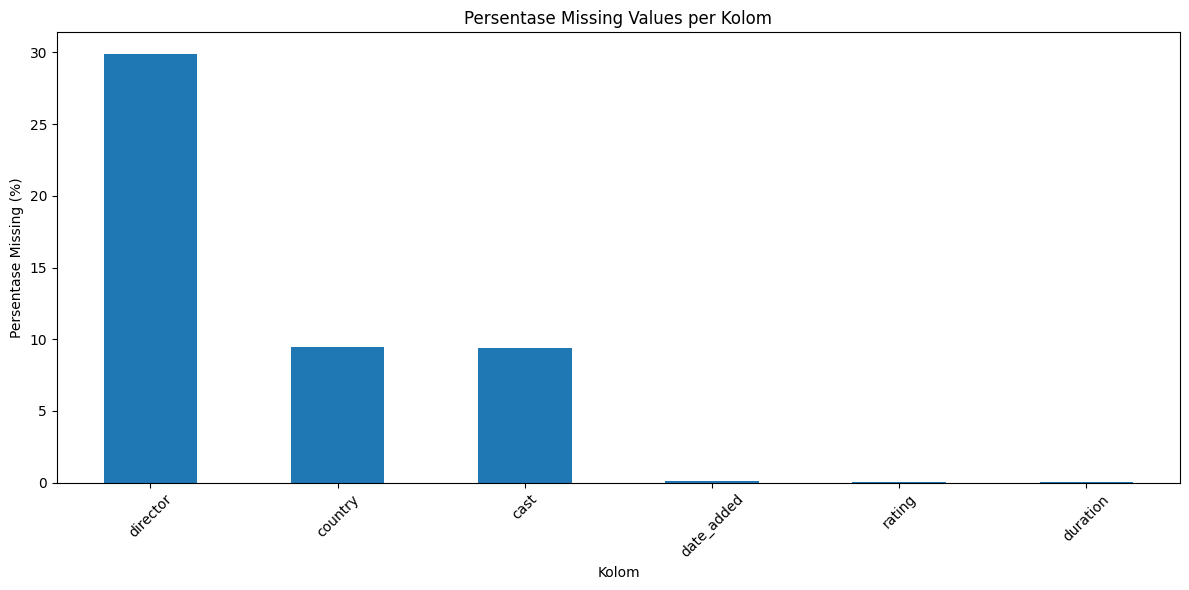

In [13]:
# Memeriksa missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("=== Missing Values ===")
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

# Visualisasi missing values
plt.figure(figsize=(12, 6))
missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)['Percentage'].plot(kind='bar')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.4. Distribusi Kelas Target

Memeriksa distribusi variabel target (type) untuk memahami keseimbangan dataset antara Movie dan TV Show.

=== Distribusi Tipe Konten ===
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Persentase Movie: 69.62%
Persentase TV Show: 30.38%


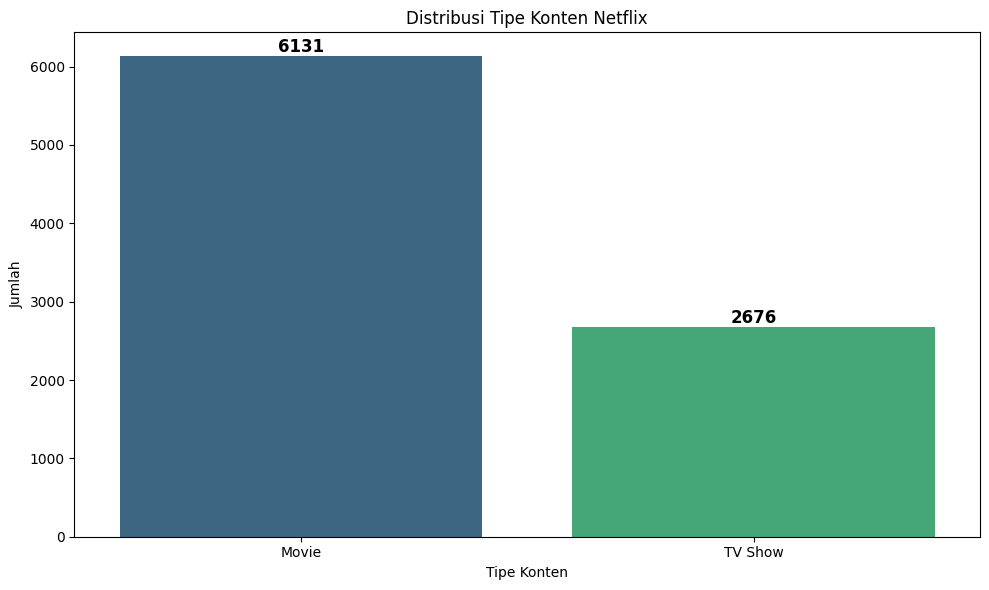

In [14]:
# Menghitung jumlah setiap kelas
type_counts = df['type'].value_counts()
print("=== Distribusi Tipe Konten ===")
print(type_counts)

print(f"\nPersentase Movie: {round(type_counts['Movie'] / len(df) * 100, 2)}%")
print(f"Persentase TV Show: {round(type_counts['TV Show'] / len(df) * 100, 2)}%")

# Visualisasi distribusi kelas
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribusi Tipe Konten Netflix')
plt.xlabel('Tipe Konten')
plt.ylabel('Jumlah')
for i, v in enumerate(type_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.5. Analisis Distribusi Fitur Lainnya

Melihat distribusi dari beberapa fitur penting lainnya seperti rating, release_year, dan country.

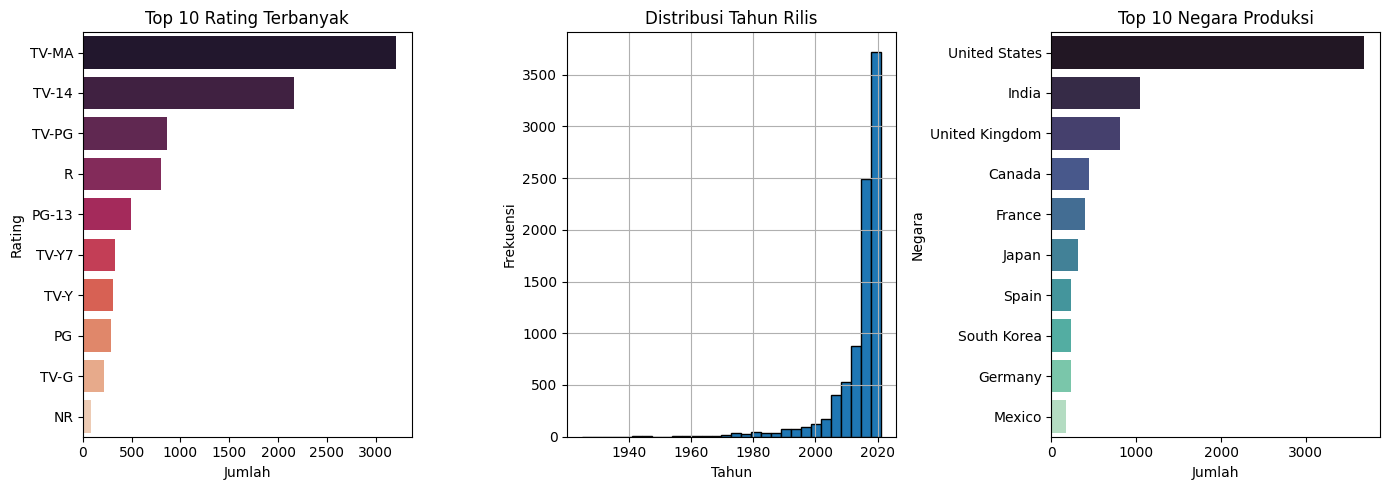

In [15]:
# Distribusi Rating
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
top_ratings = df['rating'].value_counts().head(10)
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='rocket')
plt.title('Top 10 Rating Terbanyak')
plt.xlabel('Jumlah')
plt.ylabel('Rating')

# Distribusi Release Year
plt.subplot(1, 3, 2)
df['release_year'].hist(bins=30, edgecolor='black')
plt.title('Distribusi Tahun Rilis')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')

# Distribusi Country (Top 10)
plt.subplot(1, 3, 3)
# Split country karena bisa multiple countries
countries = df['country'].dropna().str.split(', ').explode()
top_countries = countries.value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top 10 Negara Produksi')
plt.xlabel('Jumlah')
plt.ylabel('Negara')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

Berdasarkan temuan dari EDA, kita akan melakukan beberapa langkah preprocessing:
1. **Menangani Missing Values**: Mengisi atau menghapus data yang hilang
2. **Feature Engineering**: Membuat fitur baru yang relevan
3. **Encoding**: Mengubah variabel kategorikal menjadi numerik
4. **Feature Scaling**: Normalisasi fitur numerik

Mari kita lakukan preprocessing secara bertahap.

In [16]:
# Membuat salinan DataFrame untuk menghindari perubahan pada data asli
df_processed = df.copy()

print("=== Langkah 1: Menangani Missing Values ===")

# Mengisi missing values
# Director, cast, country: diisi dengan 'Unknown'
df_processed['director'] = df_processed['director'].fillna('Unknown')
df_processed['cast'] = df_processed['cast'].fillna('Unknown')
df_processed['country'] = df_processed['country'].fillna('Unknown')

# date_added: drop rows karena ini info penting untuk analisis temporal
df_processed = df_processed.dropna(subset=['date_added'])

# rating: diisi dengan modus (nilai terbanyak)
df_processed['rating'] = df_processed['rating'].fillna(df_processed['rating'].mode()[0])

# duration: tidak ada missing values berdasarkan EDA, tapi kita cek
df_processed['duration'] = df_processed['duration'].fillna('Unknown')

print(f"Jumlah baris setelah menangani missing values: {len(df_processed)}")
print(f"Missing values tersisa: {df_processed.isnull().sum().sum()}")

print("\n=== Langkah 2: Feature Engineering ===")

# Extract numeric duration
# Untuk Movie: dalam menit
# Untuk TV Show: dalam seasons
df_processed['duration_value'] = df_processed['duration'].str.extract('(\d+)').astype(float)

# Pisahkan type duration (min atau season)
df_processed['duration_type'] = df_processed['duration'].str.extract('(min|Season)', expand=False)

# Parse date_added untuk mendapatkan informasi temporal
# Strip whitespace terlebih dahulu untuk menghindari error parsing
df_processed['date_added'] = df_processed['date_added'].str.strip()
df_processed['date_added'] = pd.to_datetime(df_processed['date_added'], format='mixed', errors='coerce')

# Drop rows dengan date_added yang tidak bisa di-parse
df_processed = df_processed.dropna(subset=['date_added'])

df_processed['year_added'] = df_processed['date_added'].dt.year
df_processed['month_added'] = df_processed['date_added'].dt.month

# Hitung umur konten (tahun ditambahkan - tahun rilis)
df_processed['content_age'] = df_processed['year_added'] - df_processed['release_year']

# Hitung jumlah genre (dari listed_in)
df_processed['num_genres'] = df_processed['listed_in'].str.count(',') + 1

# Hitung jumlah negara produksi
df_processed['num_countries'] = df_processed['country'].apply(lambda x: len(x.split(', ')) if x != 'Unknown' else 0)

# Indicator apakah ada director atau cast
df_processed['has_director'] = (df_processed['director'] != 'Unknown').astype(int)
df_processed['has_cast'] = (df_processed['cast'] != 'Unknown').astype(int)

# Length of description
df_processed['description_length'] = df_processed['description'].str.len()

print("Fitur baru yang dibuat:")
print("- duration_value: Nilai numerik dari durasi")
print("- duration_type: Tipe durasi (min/Season)")
print("- year_added: Tahun konten ditambahkan")
print("- month_added: Bulan konten ditambahkan")
print("- content_age: Usia konten saat ditambahkan")
print("- num_genres: Jumlah genre")
print("- num_countries: Jumlah negara produksi")
print("- has_director: Indikator ada direktur")
print("- has_cast: Indikator ada pemeran")
print("- description_length: Panjang deskripsi")

print("\n=== Langkah 3: Encoding Target Variable ===")

# Encode target variable (type)
# Movie = 1, TV Show = 0
df_processed['type_encoded'] = (df_processed['type'] == 'Movie').astype(int)

print("Target encoding:")
print("Movie = 1")
print("TV Show = 0")

print("\n=== Langkah 4: Encoding Categorical Variables ===")

# Label encode rating
le_rating = LabelEncoder()
df_processed['rating_encoded'] = le_rating.fit_transform(df_processed['rating'])

# Label encode duration_type
le_duration = LabelEncoder()
df_processed['duration_type_encoded'] = le_duration.fit_transform(df_processed['duration_type'].fillna('Unknown'))

print(f"Rating categories: {list(le_rating.classes_)}")
print(f"Duration types: {list(le_duration.classes_)}")

print("\n=== Langkah 5: Feature Scaling ===")

# Fitur numerik yang akan di-scale
numerical_features = ['release_year', 'year_added', 'month_added', 'content_age',
                      'num_genres', 'num_countries', 'description_length', 'duration_value']

scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

print(f"Scaled features: {numerical_features}")

print("\n=== Langkah 6: Seleksi Kolom Final ===")

# Pilih kolom yang akan digunakan untuk modeling
final_columns = ['release_year', 'rating_encoded', 'duration_value', 'duration_type_encoded',
                'year_added', 'month_added', 'content_age', 'num_genres', 'num_countries',
                'has_director', 'has_cast', 'description_length', 'type_encoded']

df_final = df_processed[final_columns].copy()

print(f"Jumlah fitur final: {len(final_columns) - 1}")  # -1 karena type_encoded adalah target
print(f"Jumlah baris final: {len(df_final)}")

# Menampilkan 5 baris pertama dari data yang telah diproses
print("\n=== Sample Data yang Telah Diproses ===")
df_final.head(10)

=== Langkah 1: Menangani Missing Values ===
Jumlah baris setelah menangani missing values: 8797
Missing values tersisa: 0

=== Langkah 2: Feature Engineering ===
Fitur baru yang dibuat:
- duration_value: Nilai numerik dari durasi
- duration_type: Tipe durasi (min/Season)
- year_added: Tahun konten ditambahkan
- month_added: Bulan konten ditambahkan
- content_age: Usia konten saat ditambahkan
- num_genres: Jumlah genre
- num_countries: Jumlah negara produksi
- has_director: Indikator ada direktur
- has_cast: Indikator ada pemeran
- description_length: Panjang deskripsi

=== Langkah 3: Encoding Target Variable ===
Target encoding:
Movie = 1
TV Show = 0

=== Langkah 4: Encoding Categorical Variables ===
Rating categories: ['66 min', '74 min', '84 min', 'G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']
Duration types: ['Season', 'Unknown', 'min']

=== Langkah 5: Feature Scaling ===
Scaled features: ['release_year', 'year_added', '

,release_year,rating_encoded,duration_value,duration_type_encoded,year_added,month_added,content_age,num_genres,num_countries,has_director,has_cast,description_length,type_encoded
0,0.659344,7,0.395318,2,1.351908,0.68241,-0.419782,-1.522761,-0.180951,1,0,0.841329,1
1,0.772701,11,-1.337166,0,1.351908,0.68241,-0.533593,1.027349,-0.180951,0,1,0.357656,0
2,0.772701,11,-1.356853,0,1.351908,0.68241,-0.533593,1.027349,-1.498691,1,1,0.260921,0
3,0.772701,11,-1.356853,0,1.351908,0.68241,-0.533593,-0.247706,-1.498691,0,0,0.357656,0
4,0.772701,11,-1.337166,0,1.351908,0.68241,-0.533593,1.027349,-0.180951,0,1,0.841329,0
5,0.772701,11,-1.356853,0,1.351908,0.68241,-0.533593,1.027349,-1.498691,1,1,0.841329,0
6,0.772701,6,0.415005,2,1.351908,0.68241,-0.533593,-1.522761,-1.498691,1,1,0.938064,1
7,-2.401294,11,1.084374,2,1.351908,0.68241,2.653114,1.027349,6.407747,1,1,0.744595,1
8,0.772701,9,-1.199355,0,1.351908,0.68241,-0.533593,-0.247706,-0.180951,1,1,0.067451,0
9,0.772701,7,0.670940,2,1.351908,0.68241,-0.533593,-0.247706,-0.180951,1,1,0.744595,1


## 5. Menyimpan Dataset yang Telah Diproses

Setelah semua langkah preprocessing selesai, kita akan menyimpan dataset yang sudah bersih ke file baru.

In [17]:
# Menyimpan dataset yang sudah diproses
output_path = 'netflix_titles_processed.csv'
df_final.to_csv(output_path, index=False)

print(f"Dataset yang telah diproses berhasil disimpan ke: {output_path}")
print(f"\nDimensi dataset: {df_final.shape}")
print(f"Fitur (X): {df_final.shape[1] - 1}")
print(f"Target (y): type_encoded")
print(f"Total samples: {df_final.shape[0]}")

# Menampilkan informasi distribusi target di dataset final
print("\n=== Distribusi Target di Dataset Final ===")
print(df_final['type_encoded'].value_counts())
print(f"\nMovie (1): {(df_final['type_encoded'] == 1).sum()} ({(df_final['type_encoded'] == 1).sum() / len(df_final) * 100:.2f}%)")
print(f"TV Show (0): {(df_final['type_encoded'] == 0).sum()} ({(df_final['type_encoded'] == 0).sum() / len(df_final) * 100:.2f}%)")

Dataset yang telah diproses berhasil disimpan ke: netflix_titles_processed.csv

Dimensi dataset: (8797, 13)
Fitur (X): 12
Target (y): type_encoded
Total samples: 8797

=== Distribusi Target di Dataset Final ===
type_encoded
1    6131
0    2666
Name: count, dtype: int64

Movie (1): 6131 (69.69%)
TV Show (0): 2666 (30.31%)


## 6. Kesimpulan

Pada notebook eksperimen ini, kita telah berhasil melakukan:

1. **Data Loading**: Memuat dataset Netflix dengan 8807 baris dan 12 kolom
2. **Exploratory Data Analysis (EDA)**:
   - Mengidentifikasi missing values pada kolom director, cast, country, date_added, dan rating
   - Menganalisis distribusi target: Movie (~69%) vs TV Show (~31%)
   - Menganalisis distribusi fitur seperti rating, release_year, dan country

3. **Data Preprocessing**:
   - Menangani missing values dengan strategi yang tepat
   - Feature engineering: membuat 10 fitur baru yang relevan
   - Encoding: mengubah variabel kategorikal menjadi numerik
   - Feature scaling: normalisasi fitur numerik menggunakan StandardScaler

4. **Output**: Dataset bersih dengan 12 fitur siap untuk tahap modeling

Dataset yang telah diproses disimpan sebagai `netflix_titles_processed.csv` dan siap digunakan untuk membangun model machine learning klasifikasi tipe konten Netflix (Movie vs TV Show).